# DSI205 Project

## Cleansing 

### Data preparing

In [ ]:
!mkdir ~/.kaggle #create the .kaggle folder in your root directory
!echo '{"username":"thanaraklee","key":"e8f31ead3a829c384f4838c7a86bd030"}' > ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # set permissions
!pip install kaggle #install the kaggle library

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download thedevastator/predicting-bangkok-condominium-prices-using-web -f df_cleaned_for_ML_regression.csv --force
!unzip /content/df_cleaned_for_ML_regression.csv.zip

  0% 0.00/331k [00:00<?, ?B/s]
100% 331k/331k [00:00<00:00, 84.5MB/s]
unzip:  cannot find or open /content/df_cleaned_for_ML_regression.csv.zip, /content/df_cleaned_for_ML_regression.csv.zip.zip or /content/df_cleaned_for_ML_regression.csv.zip.ZIP.


### Data Cleansing

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import zscore
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/df_cleaned_for_ML_regression.csv')

In [ ]:
df_dummies = pd.get_dummies(df[['district','tran_type1','tran_type2','tran_type3','tran_type4','tran_type5']])
df_new = pd.concat([df, df_dummies], axis=1)
df_cleaned = df_new.drop(columns=['name','district','latitude','longitude','year_built','id','tran_type1','tran_type2','tran_type3','tran_type4','tran_type5','tran_name1','tran_name2','tran_name3','tran_name4','tran_name5',], axis=1)

df_cleaned

,proj_area,nbr_buildings,nbr_floors,units,hospital,price_sqm,bld_age,dist_shop_1,dist_shop_2,dist_shop_3,dist_shop_4,dist_shop_5,dist_school_1,dist_school_2,dist_school_3,dist_school_4,dist_school_5,dist_food_1,dist_food_2,dist_food_3,dist_food_4,dist_food_5,Elevator,Parking,Security,CCTV,Pool,Sauna,Gym,Garden,Playground,Shop,Restaurant,Wifi,dist_tran_1,dist_tran_2,dist_tran_3,dist_tran_4,dist_tran_5,district_Bang Kapi,district_Bang Khae,district_Bang Khen,district_Bang Kho Laem,district_Bang Khun Thian,district_Bang Na,district_Bang Phlat,district_Bang Rak,district_Bang Sue,district_Bangkok Noi,district_Bangkok Yai,district_Bueng Kum,district_Chatuchak,district_Chom Thong,district_Din Daeng,district_Don Mueang,district_Dusit,district_Huai Khwang,district_Khan Na Yao,district_Khlong San,district_Khlong Toei,district_Lak Si,district_Lat Krabang,district_Lat Phrao,district_Min Buri,district_Pathum Wan,district_Phasi Charoen,district_Phaya Thai,district_Phra Khanong,district_Pom Prap Sattru Phai,district_Prawet,district_Rat Burana,district_Ratchathewi,district_Sai Mai,district_Samphanthawong,district_Sathon,district_Suan Luang,district_Taling Chan,district_Thon Buri,district_Wang Thonglang,district_Watthana,district_Yan Nawa,tran_type1_bts,tran_type1_expressway,tran_type1_mrt,tran_type2_bts,tran_type2_expressway,tran_type2_mrt,tran_type3_bts,tran_type3_expressway,tran_type3_mrt,tran_type4_bts,tran_type4_expressway,tran_type4_mrt,tran_type5_bts,tran_type5_expressway,tran_type5_mrt
0,23371,5,5,834.0,2.10,10577,28,1.500,2.100,2.300,2.700,4.300,1.20,1.40,1.50,1.50,1.50,0.48,0.870,1.300,1.300,1.300,0,0,0,1,0,0,0,1,0,1,0,0,4.30,4.80,5.00,8.10,8.30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
1,6476,2,8,471.0,1.80,49059,8,0.400,0.790,0.830,0.850,1.100,0.56,0.72,0.74,0.78,0.83,0.40,0.400,0.590,0.740,0.740,1,1,1,1,0,0,1,1,0,1,1,1,5.80,6.20,6.50,9.80,9.90,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
2,4699,1,16,140.0,2.30,31129,24,0.003,0.003,0.002,0.002,0.910,0.64,0.64,0.73,0.85,0.87,0.30,0.510,0.520,0.530,0.580,1,1,1,1,0,0,0,0,0,1,0,1,2.10,2.50,2.90,6.10,6.30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
3,3816,1,8,270.0,0.68,87368,3,0.002,0.530,0.640,0.640,0.650,0.71,0.72,0.73,0.91,0.92,0.30,0.400,0.520,0.530,0.580,1,1,1,1,1,1,1,0,0,0,0,0,4.70,5.40,6.10,8.50,8.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
4,7391,2,10,560.0,0.69,42597,28,0.002,0.500,0.660,0.710,0.730,0.63,0.74,0.79,0.99,1.00,0.18,0.370,0.500,0.530,0.530,1,1,1,1,0,0,0,0,0,1,0,0,4.70,5.40,6.10,8.50,8.60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,7552,4,20,211.0,3.50,88594,12,3.000,3.000,1.800,1.800,1.800,0.32,1.10,1.20,1.40,1.40,0.38,0.003,0.003,0.003,0.003,1,1,1,1,1,1,1,1,1,0,0,1,1.30,1.60,1.80,3.40,3.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1015,5372,1,19,277.0,1.00,81765,11,2.500,2.800,3.000,8.800,9.900,0.74,0.80,1.20,1.50,1.70,0.29,0.009,0.002,0.850,0.004,1,1,1,1,1,1,1,1,0,0,0,0,2.50,2.90,2.90,6.40,6.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
1016,10832,1,33,1685.0,3.80,83746,6,0.003,0.003,0.003,0.003,0.003,0.72,0.72,0.72,0.72,0.72,0.24,0.240,0.240,0.240,0.240,1,1,1,1,1,0,1,1,0,0,0,0,0.62,0.62,0

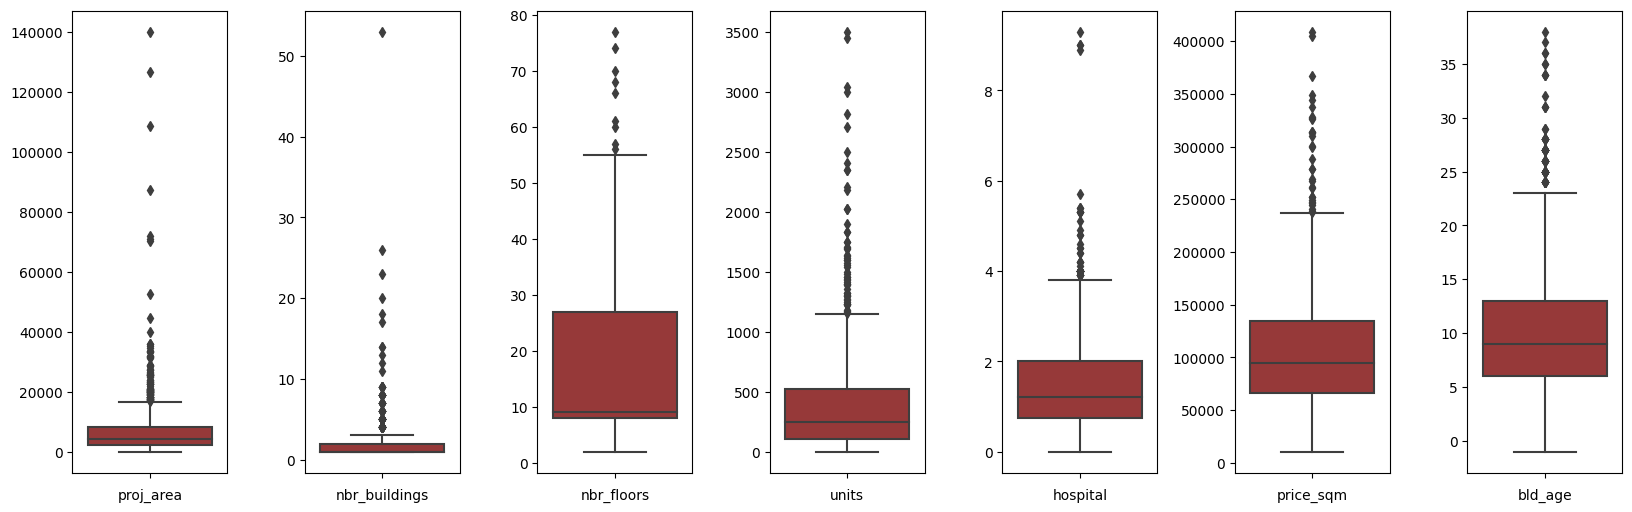

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(20, 6))
plt.subplots_adjust(wspace=0.5)

sns.boxplot(data=df_cleaned['proj_area'], ax=ax[0], color='brown',)
ax[0].set_xlabel('proj_area')

sns.boxplot(data=df_cleaned['nbr_buildings'], ax=ax[1], color='brown',)
ax[1].set_xlabel('nbr_buildings')

sns.boxplot(data=df_cleaned['nbr_floors'], ax=ax[2], color='brown',)
ax[2].set_xlabel('nbr_floors')

sns.boxplot(data=df_cleaned['units'], ax=ax[3], color='brown',)
ax[3].set_xlabel('units')

sns.boxplot(data=df_cleaned['hospital'], ax=ax[4], color='brown',)
ax[4].set_xlabel('hospital')

sns.boxplot(data=df_cleaned['price_sqm'], ax=ax[5], color='brown',)
ax[5].set_xlabel('price_sqm')

sns.boxplot(data=df_cleaned['bld_age'], ax=ax[6], color='brown',)
ax[6].set_xlabel('bld_age')

for subplot in ax:
    subplot.set_xticklabels([])


In [ ]:
df_no_outliers = df_cleaned.copy()

columns = ['proj_area','nbr_buildings','nbr_floors','units','hospital','price_sqm','bld_age']

for col in columns:
    q3 = df_cleaned[col].quantile(0.75)
    q1 = df_cleaned[col].quantile(0.25)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    df_iqr_round_1 = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]
    df_iqr_round_1 = df_iqr_round_1.dropna()
    while True:
        q1_verify = df_iqr_round_1[col].quantile(0.25)
        q3_verify = df_iqr_round_1[col].quantile(0.75)
        iqr_verify = q3_verify - q1_verify
        upper_verify = q3_verify + 1.5 * iqr_verify
        lower_verify = q1_verify - 1.5 * iqr_verify
        df_iqr_round_2 = df_iqr_round_1[(df_iqr_round_1[col] >= lower_verify) & (df_iqr_round_1[col] <= upper_verify)]
        df_iqr_round_2 = df_iqr_round_2.dropna()
        
        ##if verify using z score
        # std = 3
        # z_scores = zscore(df_iqr_round_2[col])
        # df_z_score = df_iqr_round_2[(z_scores < std) & (z_scores > -std)]
        # df_z_score = df_z_score.dropna()

        if len(df_iqr_round_2[col]) == len(df_iqr_round_1[col]):
            print(f'column: {col} ,  befor clean outlier = {len(df_cleaned[col])} rows ,   after clean {len(df_iqr_round_2[col])} rows')
            df_no_outliers[col]= df_iqr_round_2[col]
            break
        else:
            df_iqr_round_1 = df_iqr_round_2
            
df_no_outliers = df_no_outliers.dropna()

column: proj_area ,  befor clean outlier = 1019 rows ,   after clean 873 rows
column: nbr_buildings ,  befor clean outlier = 1019 rows ,   after clean 902 rows
column: nbr_floors ,  befor clean outlier = 1019 rows ,   after clean 1010 rows
column: units ,  befor clean outlier = 1019 rows ,   after clean 941 rows
column: hospital ,  befor clean outlier = 1019 rows ,   after clean 959 rows
column: price_sqm ,  befor clean outlier = 1019 rows ,   after clean 972 rows
column: bld_age ,  befor clean outlier = 1019 rows ,   after clean 865 rows


<Axes: >

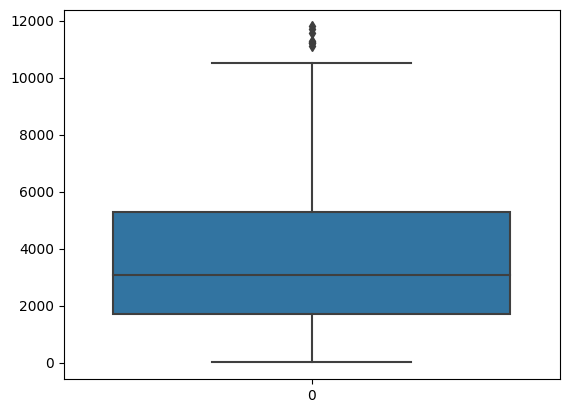

In [ ]:
sns.boxplot(data=df_no_outliers['proj_area'].values)

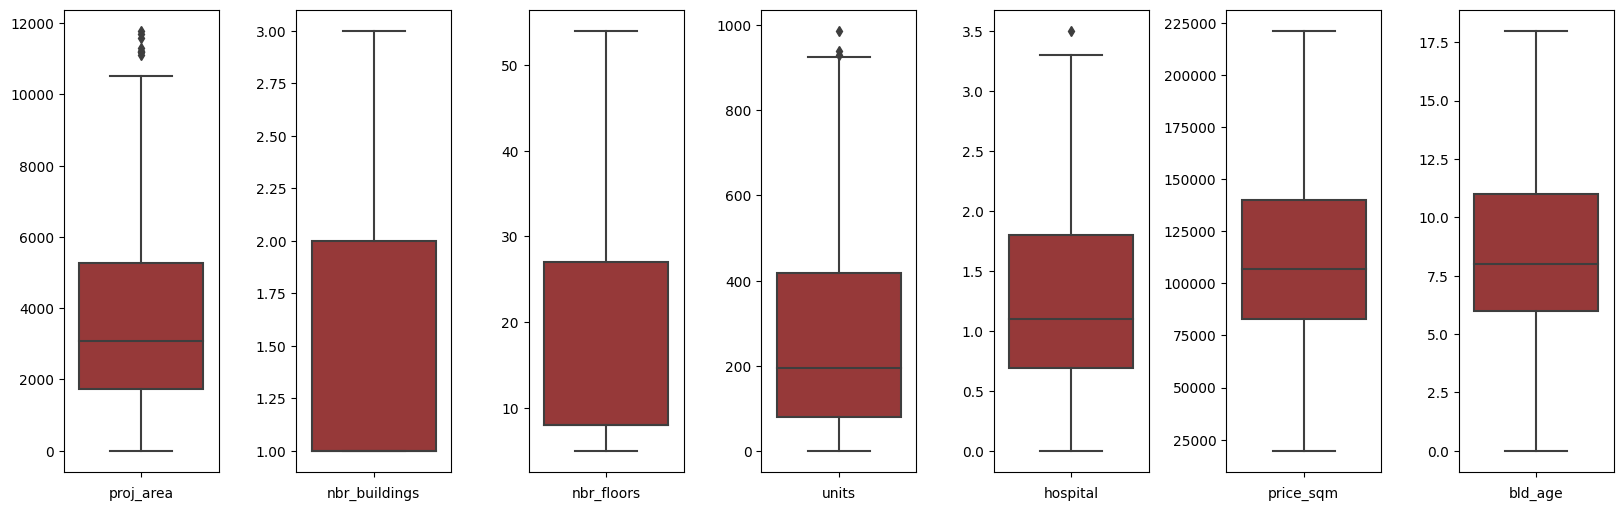

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(20, 6))
plt.subplots_adjust(wspace=0.5)

sns.boxplot(data=df_no_outliers['proj_area'].values, ax=ax[0], color='brown',)
ax[0].set_xlabel('proj_area')

sns.boxplot(data=df_no_outliers['nbr_buildings'].values, ax=ax[1], color='brown',)
ax[1].set_xlabel('nbr_buildings')

sns.boxplot(data=df_no_outliers['nbr_floors'].values, ax=ax[2], color='brown',)
ax[2].set_xlabel('nbr_floors')

sns.boxplot(data=df_no_outliers['units'].values, ax=ax[3], color='brown',)
ax[3].set_xlabel('units')

sns.boxplot(data=df_no_outliers['hospital'].values, ax=ax[4], color='brown',)
ax[4].set_xlabel('hospital')

sns.boxplot(data=df_no_outliers['price_sqm'].values, ax=ax[5], color='brown',)
ax[5].set_xlabel('price_sqm')

sns.boxplot(data=df_no_outliers['bld_age'].values, ax=ax[6], color='brown',)
ax[6].set_xlabel('bld_age')

for subplot in ax:
    subplot.set_xticklabels([])
    

## Model


### Setup

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,LinearRegression,Lasso,ElasticNet
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = df_no_outliers.copy()

In [ ]:
df['price'] = df['proj_area'] * df['price_sqm']
df.drop(columns = 'price_sqm', inplace= True)

In [ ]:
X = df.drop(columns = "price")
y = df['price'].values

In [ ]:
results = []
preds = []
train_preds = []
residuals = []
def evaluate(model, y_pred, train_pred):
  """
  param:

  model = Model name
  y_pred = predicted y from x test
  train_pred = predicted y from x train


  return:
  
  collect result in results 
  collect prediction result in preds

  result = Dataframe that has Model name, R2 Score, MAE, MSE, RMSE as columns
  preds = Dataframe that as Model name, Y Test, Y Predict, Y Train Predict, Y Train as column  

  """
  for x in y_pred:
    q75,q25 = np.percentile(y_pred,[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    y_pred[y_pred < min] = np.median(y_pred)
    y_pred[y_pred > max] = np.median(y_pred)

  matrices = ['R2 Score','MAE','MSE','RMSE']
  r2 = r2_score(y_test, y_pred.astype(int))
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)

  r2_t = r2_score(y_train, train_pred.astype(int))
  mae_t = mean_absolute_error(y_train, train_pred)
  mse_t = mean_squared_error(y_train, train_pred)
  rmse_t = np.sqrt(mse_t)

  result = pd.DataFrame({"Model":model, "Matrices": matrices, "Test Score":[r2,mae,mse,rmse],"Train Score":[r2_t,mae_t,mse_t,rmse_t]})
  pred_test = pd.DataFrame({"Model":model,"Y Test":y_test,"Y Predict":y_pred })
  pred_train = pd.DataFrame({"Model":model,"Y Train ":y_train,"Y Train Predict":train_pred})
  residual  = pd.DataFrame({"Model":model, "Residual": abs(y_test-y_pred)})

  residuals.append(residual)
  results.append(result)
  preds.append(pred_test)
  train_preds.append(pred_train)

  return result, pred_test, pred_train

In [ ]:
def compare(train,test):
    name = str(train['Model'].unique()[0])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,5))
    fig.suptitle(name)
    
    ax1.set_title('Train')
    ax1.scatter(range(len(train.iloc[:,1])),train.iloc[:,1], label='Actual Values',color='g')
    ax1.plot(train.iloc[:,2], label='Predicted Values',color='r')
    
    ax2.set_title('Test')
    ax2.scatter(range(len(test.iloc[:,1])),test.iloc[:,1], label='Actual Values',color='g')
    ax2.plot(test.iloc[:,2], label='Predicted Values',color='r')
    # set labels and title
    plt.xlabel('Data Points')
    plt.ylabel('Values')


    # add legend
    plt.legend()

    # display the plot
    return plt.show()

### Data Preparation

#### Feature Selection

In [ ]:
x_y_corr = df.corr().reset_index()[['index' , 'price']]
x_y_corr['price'] = abs(x_y_corr['price'])
corr_na = x_y_corr[x_y_corr['price'].isna()]
corr_na

,index,price
24,CCTV,NaN
42,district_Bang Khun Thian,NaN
54,district_Dusit,NaN
59,district_Lak Si,NaN
60,district_Lat Krabang,NaN
62,district_Min Buri,NaN
67,district_Pom Prap Sattru Phai,NaN
71,district_Sai Mai,NaN
75,district_Taling Chan,NaN


* ทุกคอนโดมี CCTV
* ไม่มีคอนโดใดอยู่ใน district_Bang Khun Thian 
* ไม่มีคอนโดใดอยู่ใน district_Dusit	
* ไม่มีคอนโดใดอยู่ใน district_Lak Si	 
* ไม่มีคอนโดใดอยู่ใน district_Lat Krabang
* ไม่มีคอนโดใดอยู่ใน district_Min Buri
* ไม่มีคอนโดใดอยู่ใน district_Pom Prap Sattru Phai	 
* ไม่มีคอนโดใดอยู่ใน district_Sai Mai
* ไม่มีคอนโดใดอยู่ใน district_Taling Chan
      ทั้ง column มี values เดียวกันจึงไม่ provide information ใดๆ

In [ ]:
print(f"จำนวน feature ก่อนลบ feature : {len(X.columns)}")
X.drop(columns = corr_na['index'], inplace = True)
print(f"จำนวน feature หลังลบ feature : {len(X.columns)}")


จำนวน feature ก่อนลบ feature : 95
จำนวน feature หลังลบ feature : 86


In [ ]:
X

,proj_area,nbr_buildings,nbr_floors,units,hospital,bld_age,dist_shop_1,dist_shop_2,dist_shop_3,dist_shop_4,dist_shop_5,dist_school_1,dist_school_2,dist_school_3,dist_school_4,dist_school_5,dist_food_1,dist_food_2,dist_food_3,dist_food_4,dist_food_5,Elevator,Parking,Security,Pool,Sauna,Gym,Garden,Playground,Shop,Restaurant,Wifi,dist_tran_1,dist_tran_2,dist_tran_3,dist_tran_4,dist_tran_5,district_Bang Kapi,district_Bang Khae,district_Bang Khen,district_Bang Kho Laem,district_Bang Na,district_Bang Phlat,district_Bang Rak,district_Bang Sue,district_Bangkok Noi,district_Bangkok Yai,district_Bueng Kum,district_Chatuchak,district_Chom Thong,district_Din Daeng,district_Don Mueang,district_Huai Khwang,district_Khan Na Yao,district_Khlong San,district_Khlong Toei,district_Lat Phrao,district_Pathum Wan,district_Phasi Charoen,district_Phaya Thai,district_Phra Khanong,district_Prawet,district_Rat Burana,district_Ratchathewi,district_Samphanthawong,district_Sathon,district_Suan Luang,district_Thon Buri,district_Wang Thonglang,district_Watthana,district_Yan Nawa,tran_type1_bts,tran_type1_expressway,tran_type1_mrt,tran_type2_bts,tran_type2_expressway,tran_type2_mrt,tran_type3_bts,tran_type3_expressway,tran_type3_mrt,tran_type4_bts,tran_type4_expressway,tran_type4_mrt,tran_type5_bts,tran_type5_expressway,tran_type5_mrt
1,6476.0,2.0,8.0,471.0,1.80,8.0,0.400,0.79,0.83,0.85,1.10,0.56,0.72,0.74,0.78,0.83,0.40,0.400,0.590,0.74,0.740,1,1,1,0,0,1,1,0,1,1,1,5.80,6.2,6.5,9.8,9.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
3,3816.0,1.0,8.0,270.0,0.68,3.0,0.002,0.53,0.64,0.64,0.65,0.71,0.72,0.73,0.91,0.92,0.30,0.400,0.520,0.53,0.580,1,1,1,1,1,1,0,0,0,0,0,4.70,5.4,6.1,8.5,8.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
6,5568.0,1.0,38.0,592.0,1.40,9.0,0.480,0.64,1.00,1.10,1.30,0.28,0.37,0.71,0.80,0.94,0.28,0.390,0.440,0.48,0.540,1,1,1,1,1,1,1,0,1,1,1,5.80,6.1,6.3,9.4,9.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
7,1504.0,1.0,8.0,79.0,1.80,7.0,1.500,1.50,2.40,2.80,4.90,1.10,1.30,2.20,2.50,2.50,1.30,1.600,1.600,1.60,1.600,1,1,1,1,0,1,0,0,0,0,0,1.40,2.2,3.4,3.5,3.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
8,6400.0,1.0,36.0,400.0,0.46,6.0,0.600,1.00,1.30,1.40,1.50,0.39,0.39,0.50,0.57,0.99,0.35,0.480,0.480,0.52,0.550,1,1,1,1,1,1,1,0,0,0,1,4.10,4.5,4.9,7.7,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2400.0,1.0,27.0,621.0,3.30,9.0,0.003,3.00,1.60,1.70,1.70,0.61,1.10,1.30,1.30,1.30,0.30,0.310,0.430,0.45,0.500,1,1,1,1,1,1,1,0,0,0,0,1.10,1.3,1.3,3.3,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1010,2768.0,1.0,31.0,185.0,2.60,9.0,0.003,1.20,1.20,1.20,3.00,0.67,0.69,0.91,1.00,1.20,0.24,0.240,0.660,0.72,0.740,1,1,1,1,1,1,1,0,1,0,1,1.10,1.4,1.7,2.6,3.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1011,2268.0,1.0,8.0,34.0,2.40,13.0,1.100,1.20,1.30,3.00,3.00,0.47,0.53,0.87,0.96,1.20,0.69,1.000,1.000,1.10,1.100,1,1,1,1,1,1,1,0,0,0,0,0.97,1.8,1.9,2.0,2.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
1012,1432.0,1.0,7.0,176.0,2.90,12.0,0.610,0.75,0.82,3.00,3.00,0.33,0.92,0.96,1.00,1.30,0.38,0.420,0.750,0.75,0.750,1,1,1,1,0,1,1,0,0,0,0,1.10,1.9,2.2,2.4,2.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1


<Axes: >

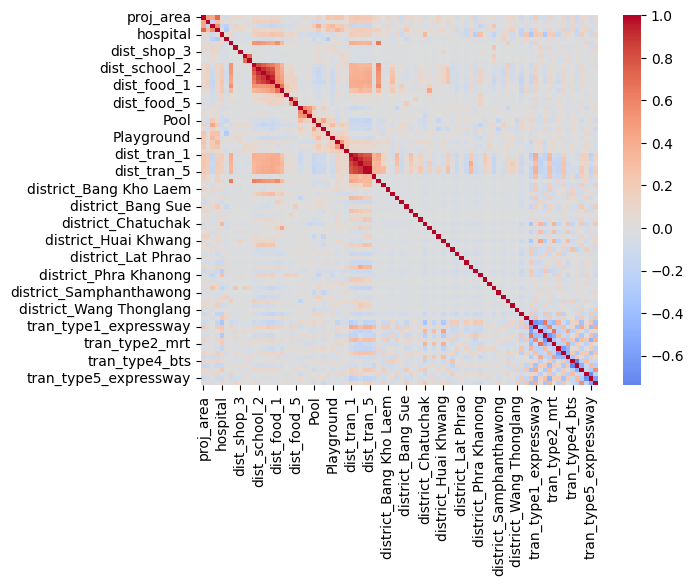

In [ ]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)

In [ ]:
# Get a Series of pairwise column combinations and their corresponding correlation values
pairwise_corr = corr_matrix.stack().reset_index()
pairwise_corr.columns = ['Column 1', 'Column 2', 'Correlation']

# Sort the Series in descending order by correlation value and filter out correlations equal to 1
pairwise_corr = pairwise_corr[(pairwise_corr['Correlation'] != 1) & (abs(pairwise_corr['Correlation'] > 0.8))]
pairwise_corr = pairwise_corr.sort_values('Correlation', ascending=False)
# Print the high correlation features DataFrame
print(len(pairwise_corr['Correlation']))
pairwise_corr

28


,Column 1,Column 2,Correlation
3131,dist_tran_5,dist_tran_4,0.985952
3046,dist_tran_4,dist_tran_5,0.985952
1219,dist_school_4,dist_school_5,0.926887
1304,dist_school_5,dist_school_4,0.926887
2785,dist_tran_1,dist_tran_2,0.926805
2870,dist_tran_2,dist_tran_1,0.926805
2872,dist_tran_2,dist_tran_3,0.920316
2957,dist_tran_3,dist_tran_2,0.920316
1130,dist_school_3,dist_school_2,0.918471
1045,dist_school_2,dist_school_3,0.918471


#### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, shuffle=True, random_state = 2023)


#### Scaling Data

In [ ]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

### Multiple Linear Regression

In [ ]:
LinearReg = LinearRegression()

LinearReg.fit(X_train_scaled, y_train)
y_pred = LinearReg.predict(X_test_scaled)
train_pred = LinearReg.predict(X_train_scaled)

In [ ]:
result, pred_test, pred_train = evaluate("Linear Regression", y_pred, train_pred)

In [ ]:
coefficients = LinearReg.coef_
intercept = LinearReg.intercept_

feature_names = X_train.columns
print('y = {:.2f}'.format(intercept), end='')
for i in range(len(coefficients)):
    print(' + ({:.2f} x {})'.format(coefficients[i], feature_names[i]), end='')
print()


y = 408624100.71 + (255177233.16 x proj_area) + (9703240.32 x nbr_buildings) + (63224950.31 x nbr_floors) + (-34063916.50 x units) + (2991209.42 x hospital) + (-40585434.07 x bld_age) + (-474831.85 x dist_shop_1) + (-766794.44 x dist_shop_2) + (4930956.46 x dist_shop_3) + (12832723.50 x dist_shop_4) + (-1556061.75 x dist_shop_5) + (-8460350.47 x dist_school_1) + (-5094847.35 x dist_school_2) + (8669949.18 x dist_school_3) + (10382233.43 x dist_school_4) + (-26913404.71 x dist_school_5) + (-12365031.69 x dist_food_1) + (2330936.96 x dist_food_2) + (216460.70 x dist_food_3) + (3268053.42 x dist_food_4) + (-4410652.36 x dist_food_5) + (1466400.25 x Elevator) + (2747675.88 x Parking) + (-6589576.72 x Security) + (18810126.58 x Pool) + (-1963571.07 x Sauna) + (-7267603.61 x Gym) + (4035104.71 x Garden) + (-66867.33 x Playground) + (11998938.35 x Shop) + (-12415621.02 x Restaurant) + (-2570777.37 x Wifi) + (-40083683.82 x dist_tran_1) + (-12446916.01 x dist_tran_2) + (-26122980.12 x dist_tra

In [ ]:
result

,Model,Matrices,Test Score,Train Score
0,Linear Regression,R2 Score,7.582539e-01,8.667819e-01
1,Linear Regression,MAE,9.828010e+07,7.972692e+07
2,Linear Regression,MSE,2.620604e+16,1.183704e+16
3,Linear Regression,RMSE,1.618828e+08,1.087982e+08


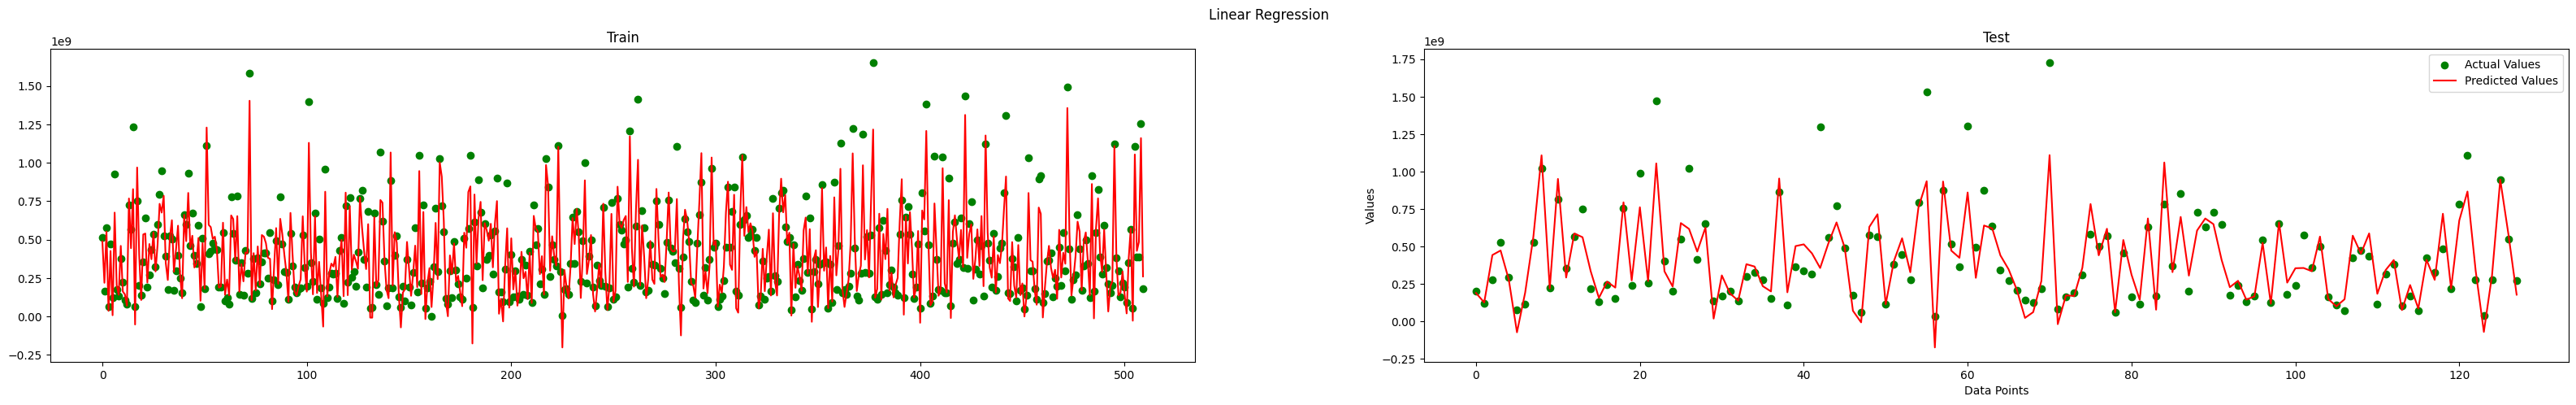

In [ ]:
compare(pred_train,pred_test)

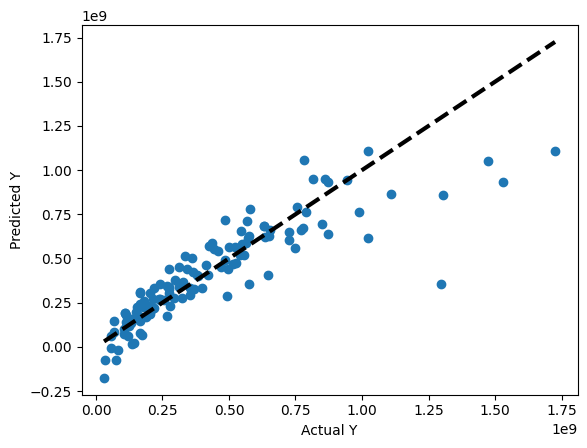

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
pairwise_corr = corr_matrix.stack().reset_index()
pairwise_corr.columns = ['Column 1', 'Column 2', 'Correlation']

# Sort the Series in descending order by correlation value and filter out correlations equal to 1
pairwise_corr = pairwise_corr[(pairwise_corr['Correlation'] != 1) & ((pairwise_corr['Correlation'] > 0.8) | (pairwise_corr['Correlation'] < -0.8))]
pairwise_corr = pairwise_corr.sort_values('Correlation', ascending=False)

# Print the sorted list
print(len(pairwise_corr))
pairwise_corr

28


,Column 1,Column 2,Correlation
3131,dist_tran_5,dist_tran_4,0.985952
3046,dist_tran_4,dist_tran_5,0.985952
1219,dist_school_4,dist_school_5,0.926887
1304,dist_school_5,dist_school_4,0.926887
2785,dist_tran_1,dist_tran_2,0.926805
2870,dist_tran_2,dist_tran_1,0.926805
2872,dist_tran_2,dist_tran_3,0.920316
2957,dist_tran_3,dist_tran_2,0.920316
1130,dist_school_3,dist_school_2,0.918471
1045,dist_school_2,dist_school_3,0.918471


In [ ]:
coef = pd.DataFrame({"Feature":feature_names, "Coefficients": np.round(coefficients,2)})
coef[coef["Feature"].isin(pairwise_corr['Column 1'].unique())]

,Feature,Coefficients
11,dist_school_1,-8460350.47
12,dist_school_2,-5094847.35
13,dist_school_3,8669949.18
14,dist_school_4,10382233.43
15,dist_school_5,-26913404.71
32,dist_tran_1,-40083683.82
33,dist_tran_2,-12446916.01
34,dist_tran_3,-26122980.12
35,dist_tran_4,-14793880.33
36,dist_tran_5,48884855.11


### Lasso Regression

In [ ]:
lassoReg = Lasso()
params = {'alpha':[1000,10000,100000,1000000,10000000,100000000,1000000000], 'max_iter':[10000], 'tol':[1e-2]}

search = GridSearchCV(lassoReg, param_grid=params, cv=7)
search.fit(X_train_scaled, y_train)
y_pred = search.predict(X_test_scaled)
train_pred = search.predict(X_train_scaled)


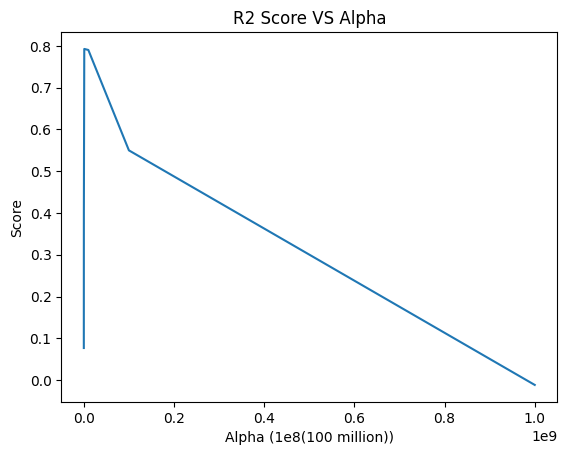

best alpha : 1000000


In [ ]:
cv_results = search.cv_results_

alphas = cv_results['param_alpha'].data.astype(float)
scores = cv_results['mean_test_score']

plt.plot(alphas, scores)
plt.title('R2 Score VS Alpha')
plt.xlabel('Alpha (1e8(100 million))')
plt.ylabel('Score')
plt.show()
print('best alpha :',search.best_params_['alpha'])

In [ ]:
result, pred_test, pred_train = evaluate("Lasso Regression", y_pred, train_pred)

In [ ]:
result

,Model,Matrices,Test Score,Train Score
0,Lasso Regression,R2 Score,7.642117e-01,8.644661e-01
1,Lasso Regression,MAE,9.343145e+07,7.939282e+07
2,Lasso Regression,MSE,2.556021e+16,1.204281e+16
3,Lasso Regression,RMSE,1.598756e+08,1.097397e+08


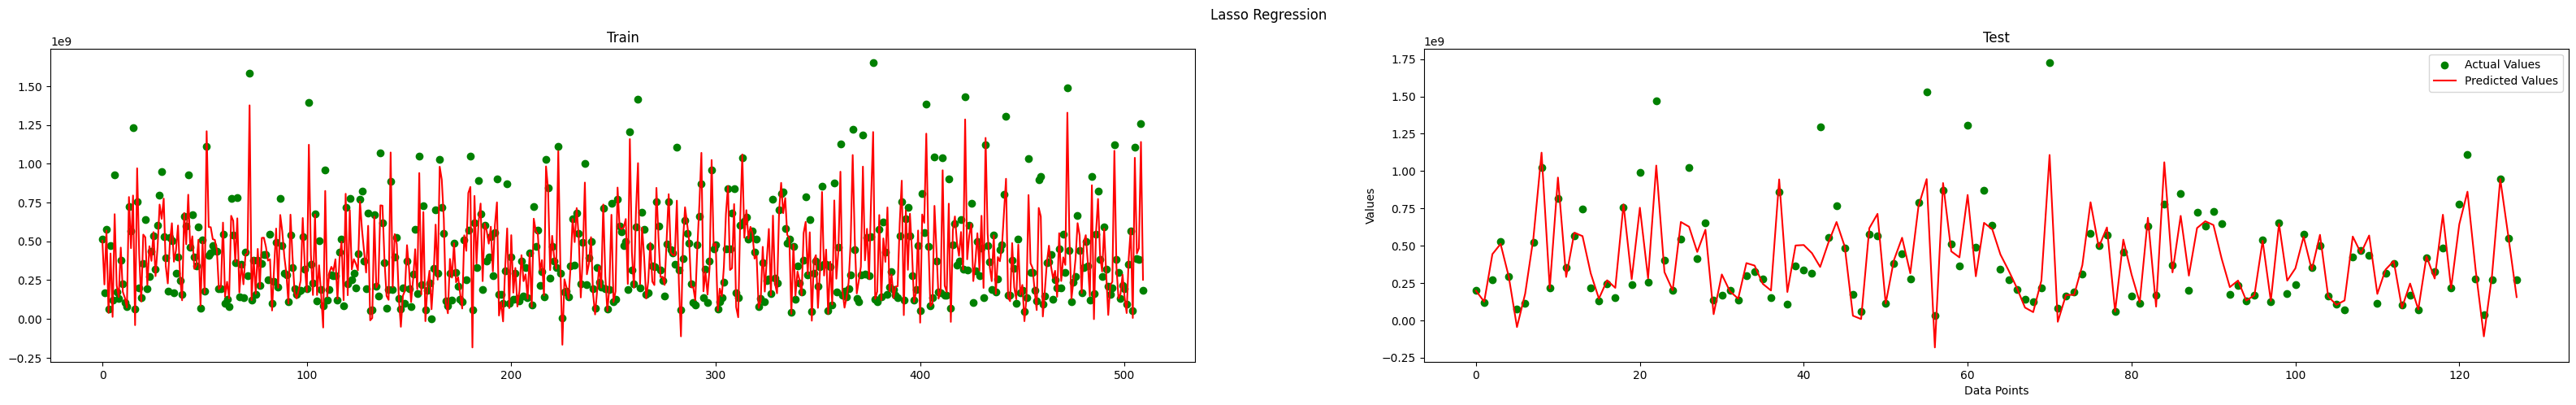

In [ ]:
compare(pred_train, pred_test)

In [ ]:
best_lasso = search.best_estimator_
intercept = best_lasso.intercept_
coefficients = best_lasso.coef_
alpha = best_lasso.alpha

formula = 'y = {:.2f}'.format(intercept)
for i, coef in enumerate(coefficients):
    formula += ' + {:.2f}*x{}'.format(coef, i+1)
    
formula += ' + {:.2f}* L1 penalty'.format(alpha)
    
print(formula,'\nwhere \n - L1 penalty = alpha * ||β|| \n - β = vector of coefficients \n - alpha = regularization parameter')

y = 408622544.97 + 252158764.79*x1 + 6196603.73*x2 + 59978789.96*x3 + -30431405.41*x4 + 0.00*x5 + -38267374.97*x6 + 0.00*x7 + 0.00*x8 + 4205904.69*x9 + 10755570.25*x10 + -0.00*x11 + -6584950.25*x12 + -0.00*x13 + 2364308.43*x14 + 1152451.39*x15 + -14715091.65*x16 + -10376489.38*x17 + -0.00*x18 + -0.00*x19 + 107238.54*x20 + -1553979.07*x21 + 0.00*x22 + 565315.39*x23 + -2778854.58*x24 + 16141077.48*x25 + -0.00*x26 + -4041118.77*x27 + 3465884.09*x28 + 0.00*x29 + 7929172.60*x30 + -8742485.46*x31 + -1674179.53*x32 + -43806901.03*x33 + -10629155.13*x34 + -8481859.92*x35 + 1245921.85*x36 + 4976637.01*x37 + -3400318.15*x38 + 16674459.08*x39 + -8605714.84*x40 + -884290.33*x41 + -14675404.88*x42 + 290567.27*x43 + 10983266.03*x44 + -16055731.93*x45 + -0.00*x46 + -9348460.19*x47 + -3628043.98*x48 + -4857138.93*x49 + -4802013.21*x50 + -11448880.91*x51 + -20021982.60*x52 + 520631.20*x53 + 2580990.85*x54 + -7309854.79*x55 + 22039263.23*x56 + -9346871.65*x57 + 10648353.39*x58 + -4792793.43*x59 + -52105

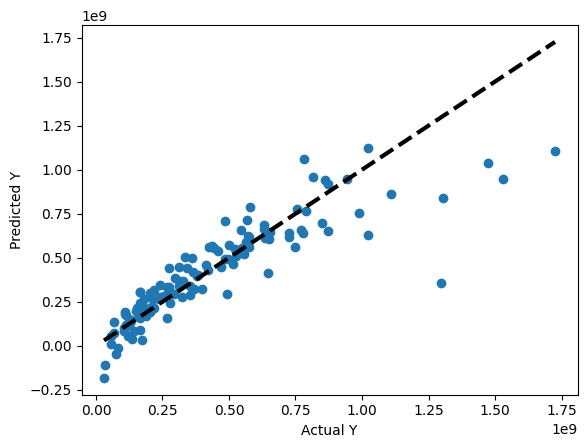

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.show()

<Axes: >

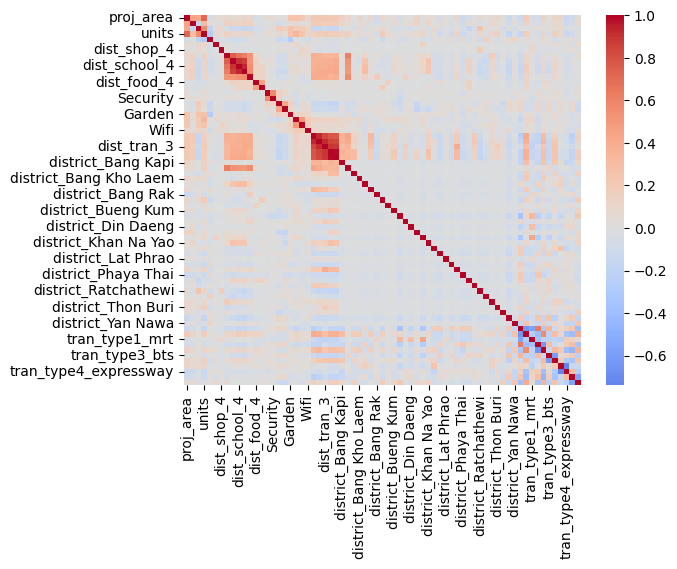

In [ ]:
selected_features = X.columns[coefficients != 0]

# Calculate the correlation matrix
corr_matrix = X.loc[:,selected_features].corr()


# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)

In [ ]:
pairwise_corr = corr_matrix.stack().reset_index()
pairwise_corr.columns = ['Column 1', 'Column 2', 'Correlation']

# Sort the Series in descending order by correlation value and filter out correlations equal to 1
pairwise_corr = pairwise_corr[(pairwise_corr['Correlation'] != 1) & ((pairwise_corr['Correlation'] > 0.8) | (pairwise_corr['Correlation'] < -0.8))]
pairwise_corr = pairwise_corr.sort_values('Correlation', ascending=False)

# Print the sorted list
print(len(pairwise_corr))
pairwise_corr

22


,Column 1,Column 2,Correlation
1819,dist_tran_5,dist_tran_4,0.985952
1751,dist_tran_4,dist_tran_5,0.985952
631,dist_school_4,dist_school_5,0.926887
699,dist_school_5,dist_school_4,0.926887
1609,dist_tran_2,dist_tran_1,0.926805
1541,dist_tran_1,dist_tran_2,0.926805
1679,dist_tran_3,dist_tran_2,0.920316
1611,dist_tran_2,dist_tran_3,0.920316
561,dist_school_3,dist_school_4,0.904559
629,dist_school_4,dist_school_3,0.904559


In [ ]:
coef = pd.DataFrame({"Feature":feature_names, "Coefficients": np.round(coefficients,2)})
coef[coef["Feature"].isin(pairwise_corr['Column 1'].unique())]

,Feature,Coefficients
13,dist_school_3,2364308.43
14,dist_school_4,1152451.39
15,dist_school_5,-14715091.65
32,dist_tran_1,-43806901.03
33,dist_tran_2,-10629155.13
34,dist_tran_3,-8481859.92
35,dist_tran_4,1245921.85
36,dist_tran_5,4976637.01


### Ridge Regression

In [ ]:
ridgeReg = Ridge()
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 1,10,100,1000], 'max_iter':[10000], 'tol':[1e-2]}

search = GridSearchCV(ridgeReg, param_grid=params, cv=6)
search.fit(X_train_scaled, y_train)
y_pred = search.predict(X_test_scaled)
train_pred = search.predict(X_train_scaled)

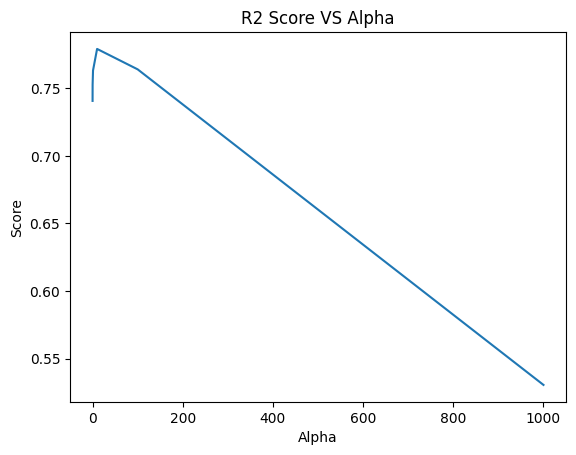

best alpha : 10


In [ ]:
cv_results = search.cv_results_

alphas = cv_results['param_alpha'].data.astype(float)
scores = cv_results['mean_test_score']

plt.plot(alphas, scores)
plt.title('R2 Score VS Alpha')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()
print('best alpha :',search.best_params_['alpha'])

In [ ]:
result, pred_test, pred_train = evaluate("Ridge Regression", y_pred, train_pred)

In [ ]:
result

,Model,Matrices,Test Score,Train Score
0,Ridge Regression,R2 Score,7.597243e-01,8.656744e-01
1,Ridge Regression,MAE,9.574621e+07,7.949560e+07
2,Ridge Regression,MSE,2.604664e+16,1.193545e+16
3,Ridge Regression,RMSE,1.613897e+08,1.092495e+08


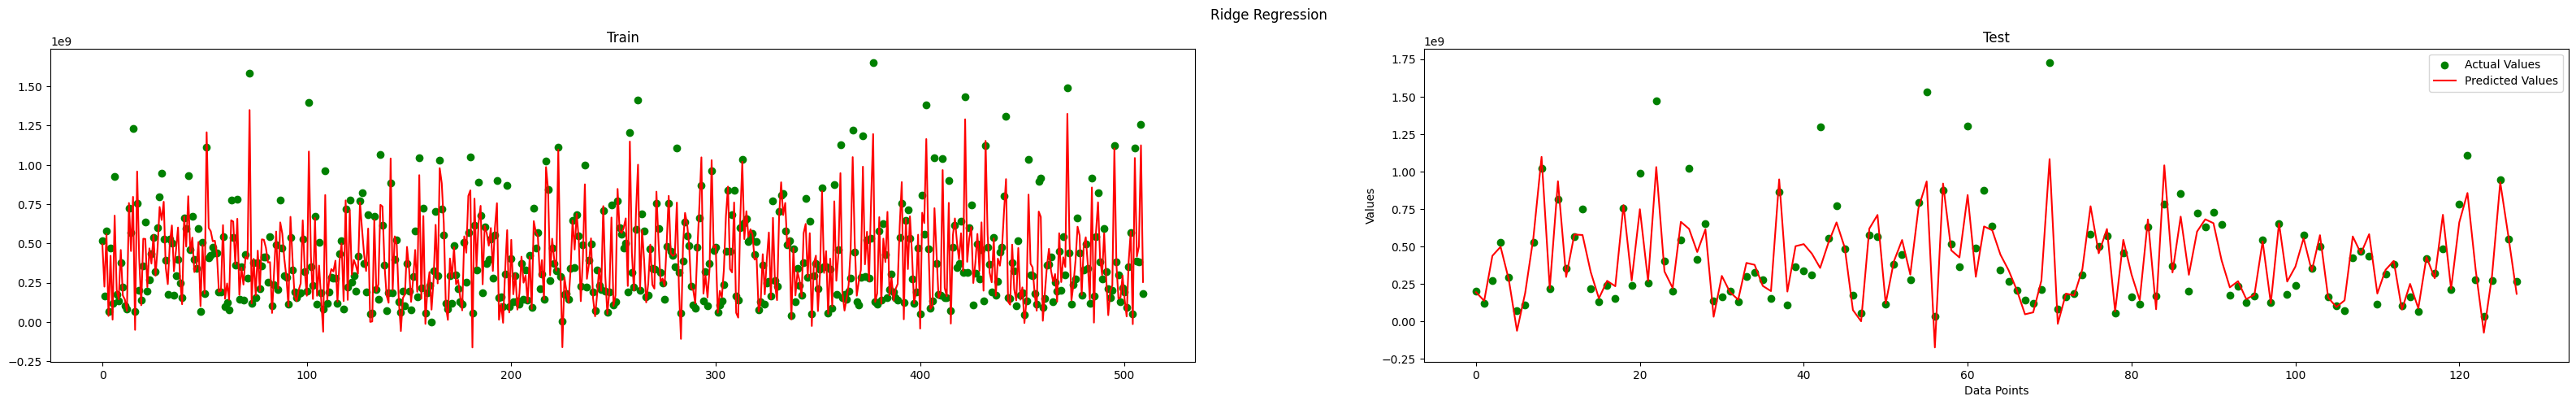

In [ ]:
compare(pred_train, pred_test)

In [ ]:
best_ridge = search.best_estimator_
intercept = best_ridge.intercept_
coefficients = best_ridge.coef_
alpha = best_ridge.alpha

formula = 'y = {:.2f}'.format(intercept)
for i, coef in enumerate(coefficients):
    formula += ' + {:.2f}*x{}'.format(coef, i+1)
    
formula += ' + {:.2f} * L2 penalty'.format(alpha)
    
print(formula,'\nwhere \n - L2 penalty = β^2 \n - β = vector of coefficients \n - alpha = regularization parameter')


y = 408622544.97 + 241032380.45*x1 + 11708974.66*x2 + 62682279.97*x3 + -24992892.53*x4 + 1806531.00*x5 + -38209554.66*x6 + 403618.98*x7 + 375919.26*x8 + 5395662.51*x9 + 12851892.56*x10 + -1537029.52*x11 + -8117067.01*x12 + -5219897.14*x13 + 6543268.73*x14 + 7289386.37*x15 + -21481352.96*x16 + -10822508.35*x17 + 986548.81*x18 + -164548.08*x19 + 1931231.34*x20 + -3470859.87*x21 + -284449.35*x22 + 3601242.78*x23 + -5773926.78*x24 + 17813706.25*x25 + -1237871.10*x26 + -5656736.21*x27 + 5592084.31*x28 + 412191.75*x29 + 10476338.76*x30 + -10909952.25*x31 + -2792503.16*x32 + -35876412.85*x33 + -16995868.80*x34 + -22212971.38*x35 + 3520985.59*x36 + 24262193.35*x37 + -6707227.36*x38 + 15889555.14*x39 + -13596161.51*x40 + -1741942.47*x41 + -14866679.52*x42 + 1661003.89*x43 + 11899948.22*x44 + -17852039.06*x45 + -2012423.74*x46 + -11132921.07*x47 + -8379546.55*x48 + -7206827.99*x49 + -5964201.70*x50 + -13078586.51*x51 + -23604886.20*x52 + -81456.07*x53 + -137146.27*x54 + -7736114.10*x55 + 2309276

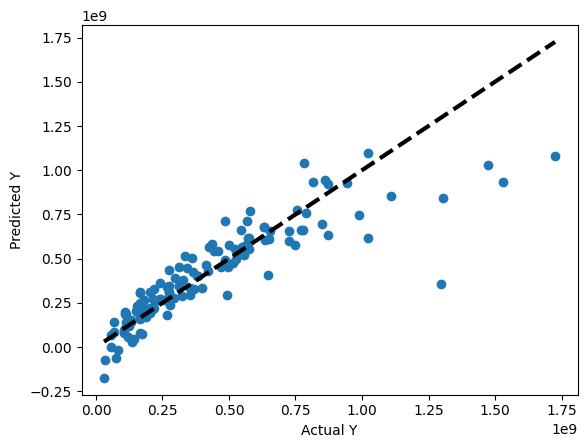

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.show()

<Axes: >

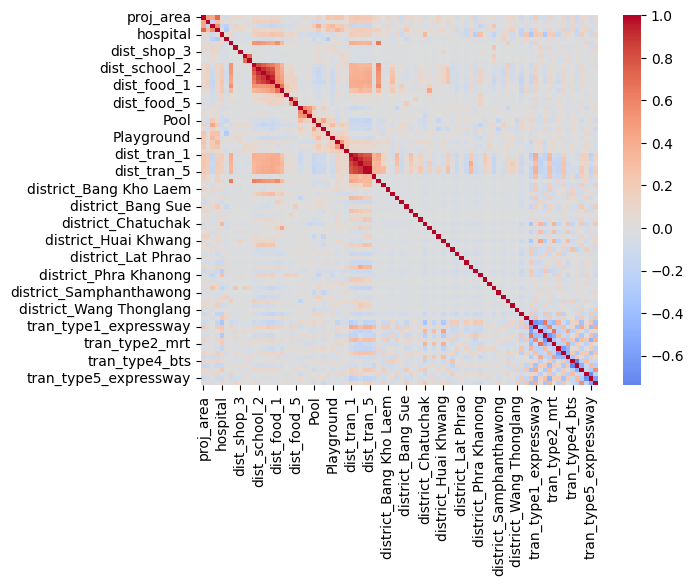

In [ ]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)

In [ ]:
pairwise_corr = corr_matrix.stack().reset_index()
pairwise_corr.columns = ['Column 1', 'Column 2', 'Correlation']

# Sort the Series in descending order by correlation value and filter out correlations equal to 1
pairwise_corr = pairwise_corr[(pairwise_corr['Correlation'] != 1) & ((pairwise_corr['Correlation'] > 0.8) | (pairwise_corr['Correlation'] < -0.8))]
pairwise_corr = pairwise_corr.sort_values('Correlation', ascending=False)

# Print the sorted list
print(len(pairwise_corr))
pairwise_corr

28


,Column 1,Column 2,Correlation
3131,dist_tran_5,dist_tran_4,0.985952
3046,dist_tran_4,dist_tran_5,0.985952
1219,dist_school_4,dist_school_5,0.926887
1304,dist_school_5,dist_school_4,0.926887
2785,dist_tran_1,dist_tran_2,0.926805
2870,dist_tran_2,dist_tran_1,0.926805
2872,dist_tran_2,dist_tran_3,0.920316
2957,dist_tran_3,dist_tran_2,0.920316
1130,dist_school_3,dist_school_2,0.918471
1045,dist_school_2,dist_school_3,0.918471


In [ ]:
coef = pd.DataFrame({"Feature":feature_names, "Coefficients": np.round(coefficients,2)})
coef[coef["Feature"].isin(pairwise_corr['Column 1'].unique())]

,Feature,Coefficients
11,dist_school_1,-8117067.01
12,dist_school_2,-5219897.14
13,dist_school_3,6543268.73
14,dist_school_4,7289386.37
15,dist_school_5,-21481352.96
32,dist_tran_1,-35876412.85
33,dist_tran_2,-16995868.80
34,dist_tran_3,-22212971.38
35,dist_tran_4,3520985.59
36,dist_tran_5,24262193.35


### Elastic Net

In [ ]:
elasticNet = ElasticNet()
params = {'alpha':np.linspace(0.01, 0.5, 10),'l1_ratio':np.linspace(0.1, 0.9, 10) ,'max_iter':[10000], 'tol':[1e-2]}

search = GridSearchCV(elasticNet, param_grid=params, cv=6)
search.fit(X_train_scaled, y_train)
y_pred = search.predict(X_test_scaled)
train_pred = search.predict(X_train_scaled)

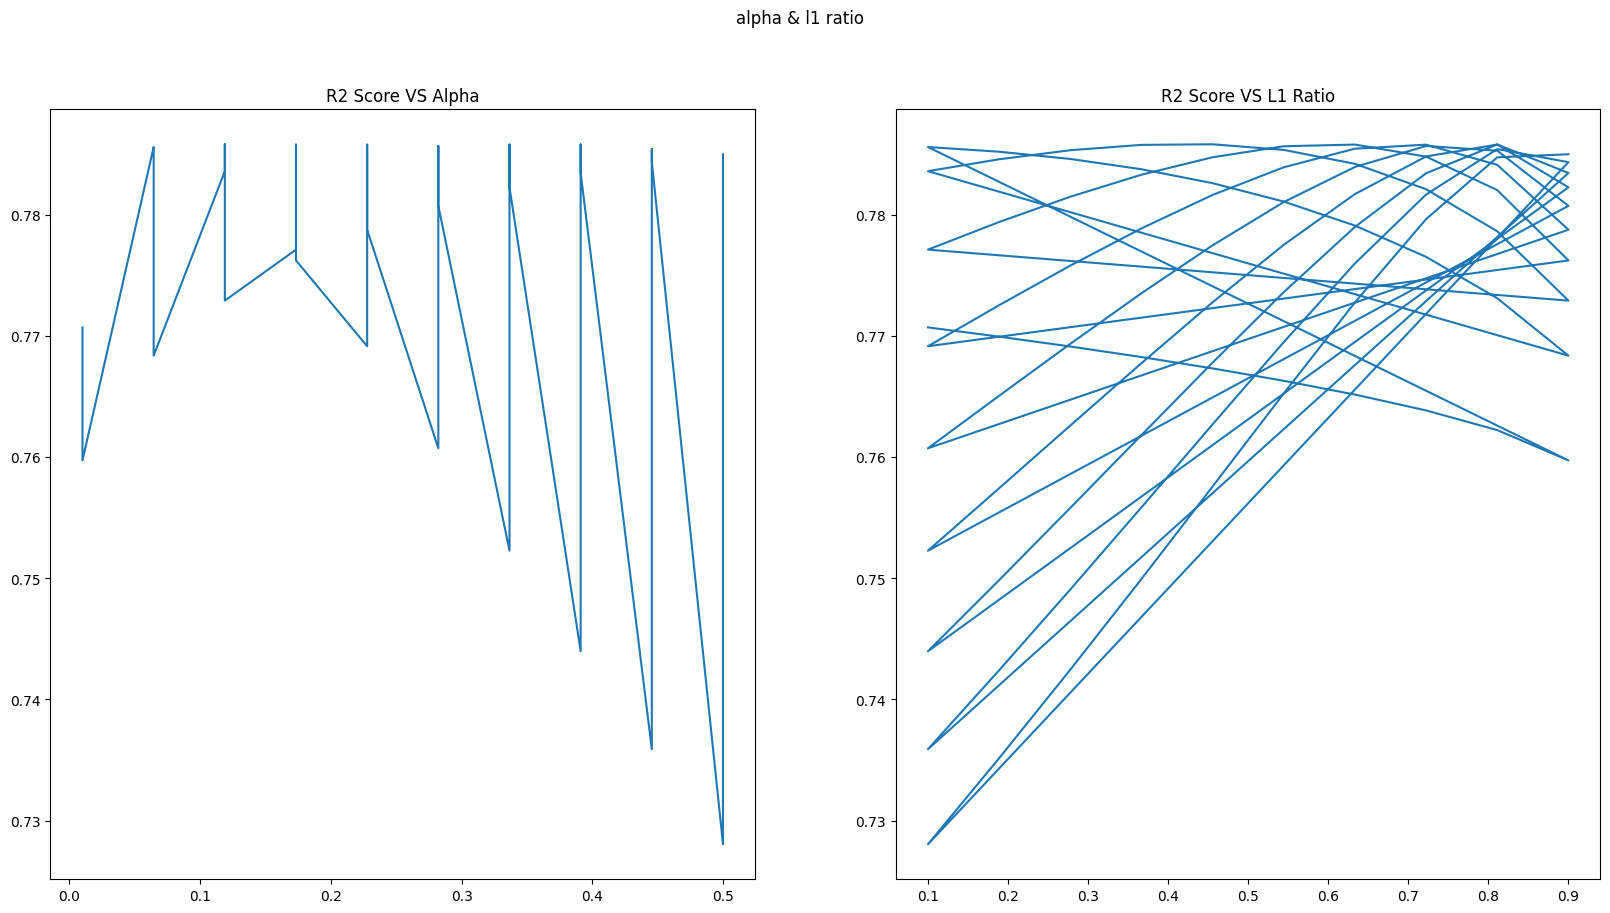

best alpha : 0.119 
best l1 ratio: 0.456


In [ ]:
cv_results = search.cv_results_

alphas = cv_results['param_alpha'].data.astype(float)
l1_ratio = cv_results['param_l1_ratio'].data.astype(float)
scores = cv_results['mean_test_score']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('alpha & l1 ratio')
ax1.plot(alphas, scores)
ax1.set_title('R2 Score VS Alpha')

ax2.plot(l1_ratio,scores)
ax2.set_title('R2 Score VS L1 Ratio')

plt.show()
print('best alpha : {:.3f}'.format(search.best_params_['alpha']),"\nbest l1 ratio: {:.3f}".format(search.best_params_['l1_ratio']))

In [ ]:
result, pred_test, pred_train = evaluate("Elastic Net", y_pred, train_pred)

In [ ]:
result

,Model,Matrices,Test Score,Train Score
0,Elastic Net,R2 Score,7.539528e-01,8.588925e-01
1,Elastic Net,MAE,9.531414e+07,8.008909e+07
2,Elastic Net,MSE,2.667230e+16,1.253805e+16
3,Elastic Net,RMSE,1.633166e+08,1.119734e+08


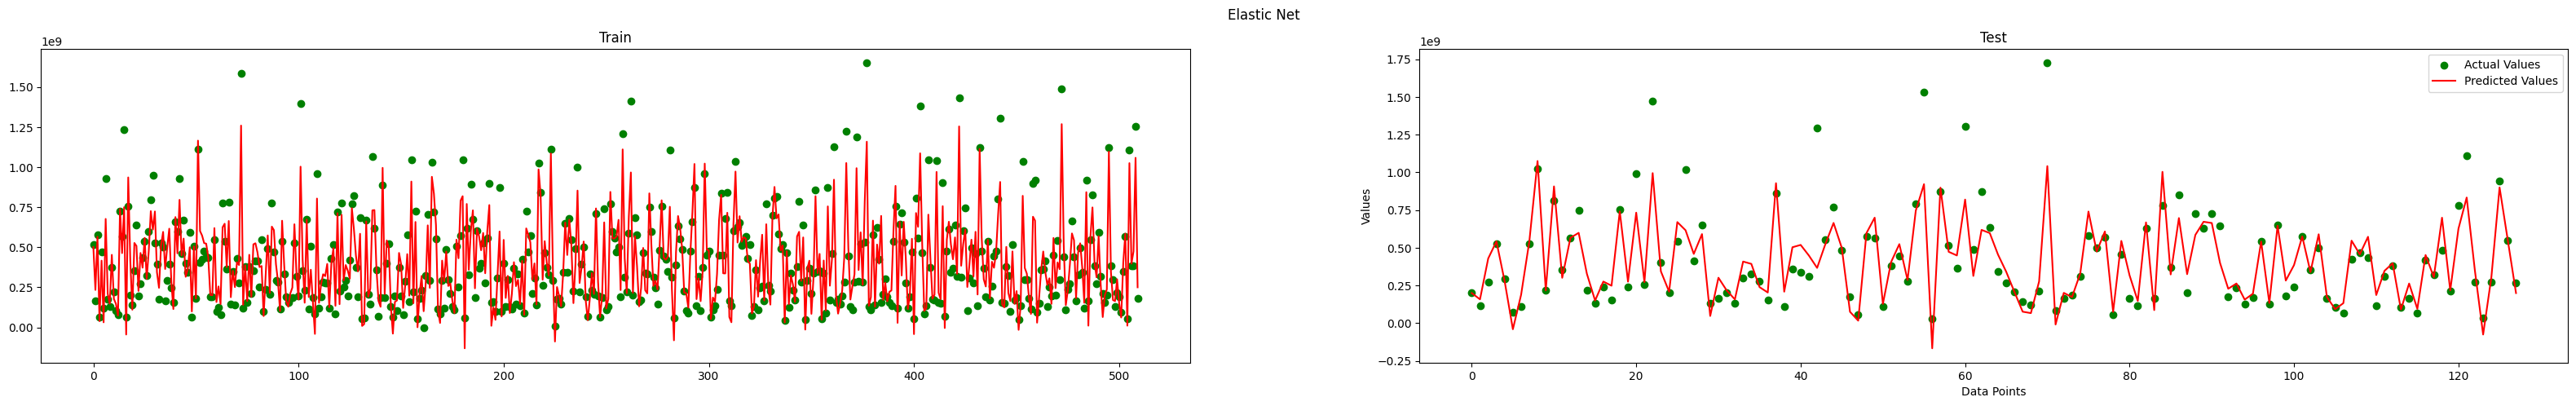

In [ ]:
compare(pred_train, pred_test)

In [ ]:
best_elastic = search.best_estimator_
intercept = best_elastic.intercept_
coefficients = best_elastic.coef_
alpha = best_elastic.alpha
l1_ratio = best_elastic.l1_ratio

formula = 'y = {:.2f}'.format(intercept)
for i, coef in enumerate(coefficients):
    formula += ' + {:.2f}*x{}'.format(coef, i+1)
    
formula += ' + {:.2f}*(({:.3f}* L1 penalty)+(1-{:.3f}) * L2 penalty)'.format(alpha,l1_ratio,l1_ratio,l1_ratio)
    
print(formula,'\nwhere \n - L1 penalty = ||β|| \n - L2 penalty = β^2 \n - β = vector of coefficients \n - alpha = regularization parameter \n - l1 ratio = parameter that controls the balance between the L1 and L2')


y = 408622544.97 + 215703036.89*x1 + 15538370.18*x2 + 61649075.75*x3 + -9748211.07*x4 + 345625.02*x5 + -34199368.39*x6 + 1043269.26*x7 + 2099331.14*x8 + 6164440.95*x9 + 12526593.67*x10 + -1127241.51*x11 + -7916051.33*x12 + -4467110.85*x13 + 2835066.40*x14 + 4364484.58*x15 + -15332426.96*x16 + -8789921.71*x17 + -876543.61*x18 + -538616.77*x19 + 449397.04*x20 + -2521229.39*x21 + -2244193.34*x22 + 4595846.28*x23 + -4591737.19*x24 + 16156885.29*x25 + 509324.67*x26 + -3257733.18*x27 + 8584783.26*x28 + 1322702.40*x29 + 8282511.92*x30 + -8369258.19*x31 + -3136455.20*x32 + -29109111.06*x33 + -17629634.70*x34 + -18814471.60*x35 + 4134328.68*x36 + 12436944.73*x37 + -4698888.63*x38 + 13722285.58*x39 + -11538230.06*x40 + -891527.12*x41 + -15005920.14*x42 + 1711012.71*x43 + 9585361.49*x44 + -17372278.51*x45 + -350828.18*x46 + -10085436.40*x47 + -6594131.70*x48 + -6924261.76*x49 + -4162463.25*x50 + -12948412.05*x51 + -18769075.80*x52 + 802825.85*x53 + 2719403.25*x54 + -5951593.03*x55 + 21484442.19*x

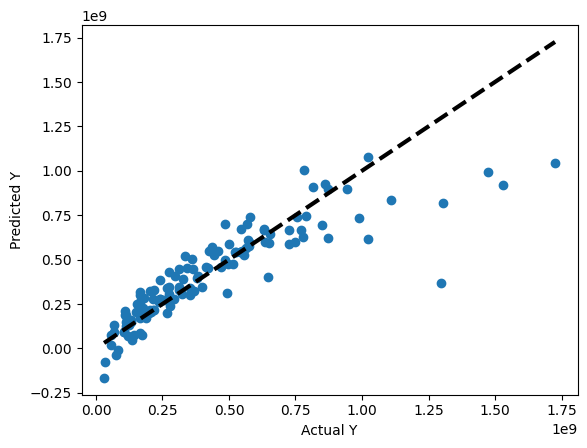

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
pairwise_corr = corr_matrix.stack().reset_index()
pairwise_corr.columns = ['Column 1', 'Column 2', 'Correlation']

# Sort the Series in descending order by correlation value and filter out correlations equal to 1
pairwise_corr = pairwise_corr[(pairwise_corr['Correlation'] != 1) & ((pairwise_corr['Correlation'] > 0.8) | (pairwise_corr['Correlation'] < -0.8))]
pairwise_corr = pairwise_corr.sort_values('Correlation', ascending=False)

# Print the sorted list
print(len(pairwise_corr))
pairwise_corr

28


,Column 1,Column 2,Correlation
3131,dist_tran_5,dist_tran_4,0.985952
3046,dist_tran_4,dist_tran_5,0.985952
1219,dist_school_4,dist_school_5,0.926887
1304,dist_school_5,dist_school_4,0.926887
2785,dist_tran_1,dist_tran_2,0.926805
2870,dist_tran_2,dist_tran_1,0.926805
2872,dist_tran_2,dist_tran_3,0.920316
2957,dist_tran_3,dist_tran_2,0.920316
1130,dist_school_3,dist_school_2,0.918471
1045,dist_school_2,dist_school_3,0.918471


In [ ]:
coef = pd.DataFrame({"Feature":feature_names, "Coefficients": np.round(coefficients,2)})
coef[coef["Feature"].isin(pairwise_corr['Column 1'].unique())]

,Feature,Coefficients
11,dist_school_1,-7916051.33
12,dist_school_2,-4467110.85
13,dist_school_3,2835066.40
14,dist_school_4,4364484.58
15,dist_school_5,-15332426.96
32,dist_tran_1,-29109111.06
33,dist_tran_2,-17629634.70
34,dist_tran_3,-18814471.60
35,dist_tran_4,4134328.68
36,dist_tran_5,12436944.73


### Results

In [ ]:
all_res = pd.concat(results)
scores = all_res.loc[all_res["Matrices"] == "R2 Score", :].sort_values('Test Score', ascending = False)
scores

,Model,Matrices,Test Score,Train Score
0,Lasso Regression,R2 Score,0.764212,0.864466
0,Ridge Regression,R2 Score,0.759724,0.865674
0,Linear Regression,R2 Score,0.758254,0.866782
0,Elastic Net,R2 Score,0.753953,0.858893


In [ ]:
all_preds = pd.concat(preds)
all_trains = pd.concat(train_preds)
all_preds['Y Predict'] = all_preds['Y Predict'].astype(int)
all_trains['Y Train Predict'] = all_trains['Y Train Predict'].astype(int)

In [ ]:
def plotting(axe, model,test):
  if test == True:
    score_is = "Test Score"
    df = all_preds
  else:
    score_is = "Train Score"
    df = all_trains
  score = scores.loc[scores["Model"] == model, score_is]
  tab = df.loc[df['Model'] == model, :]
  axe.set_title("{} (R2-score = {:.3f})".format(model,score.values.tolist()[0]))
  axe.scatter(range(len(tab.iloc[:,1])), tab.iloc[:,1], label='Actual Values',color='g')
  axe.plot(tab.iloc[:,2], label='Predicted Values',color='r')
 

#### Y Test VS Y Prediction

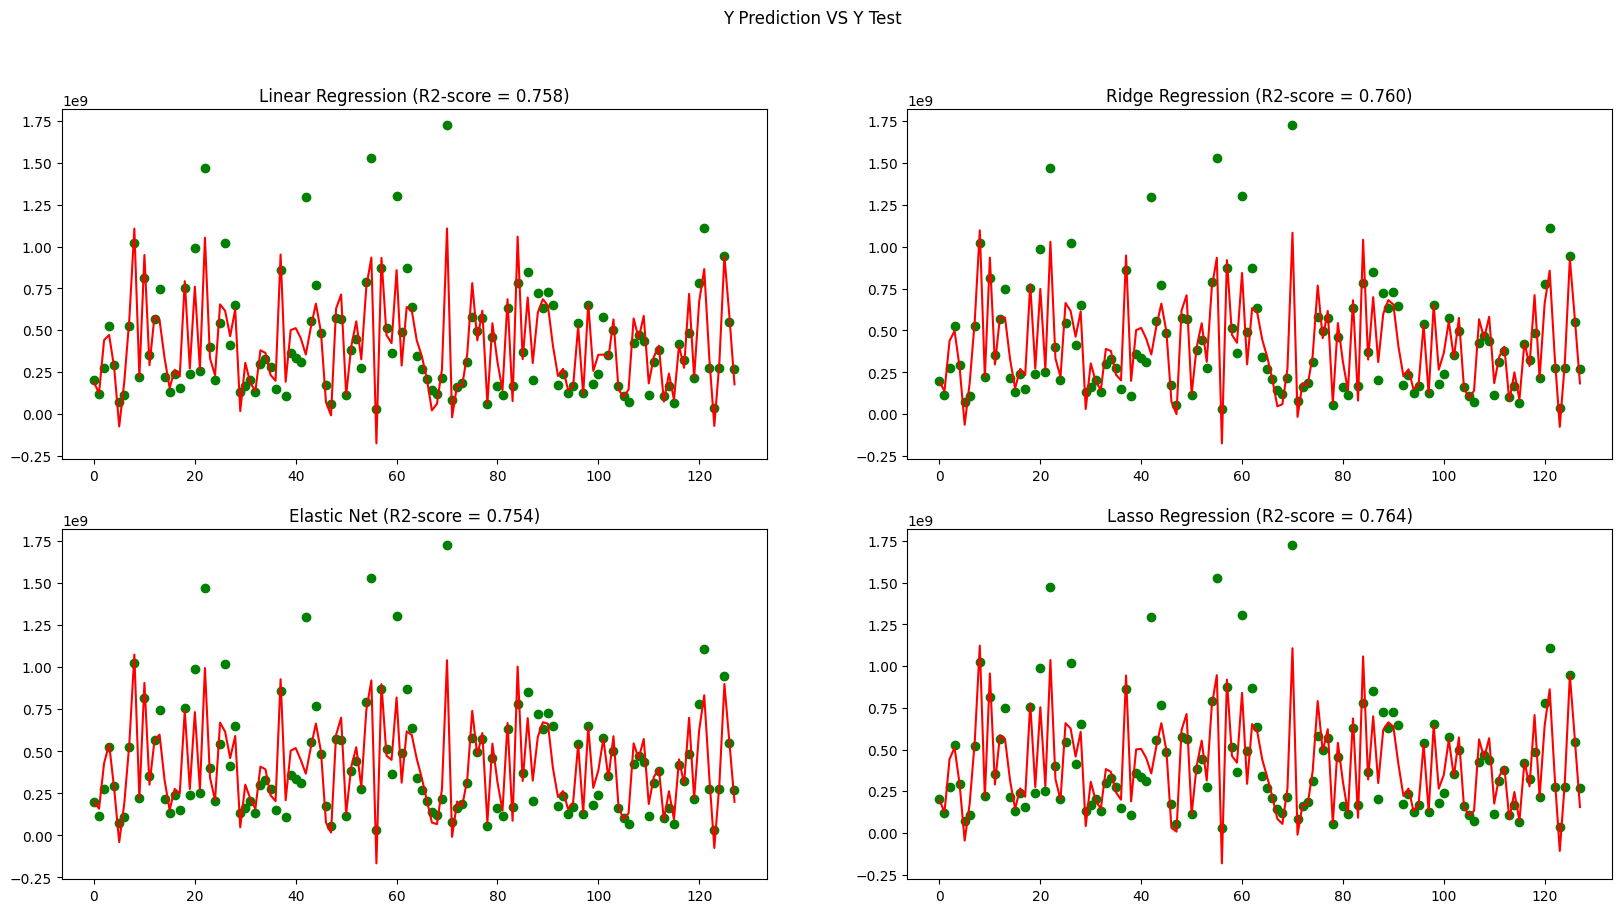

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle("Y Prediction VS Y Test")
plotting(axs[0,0], "Linear Regression",True)
plotting(axs[0,1], "Ridge Regression",True)
plotting(axs[1,0], "Elastic Net",True)
plotting(axs[1,1], "Lasso Regression",True)

In [ ]:
all_res.pivot_table(index="Model",columns='Matrices',values="Test Score").sort_values('R2 Score',ascending = False).round(3)

Matrices,MAE,MSE,R2 Score,RMSE
Model,,,,
Lasso Regression,9.343145e+07,2.556021e+16,0.764,1.598756e+08
Ridge Regression,9.574621e+07,2.604664e+16,0.760,1.613897e+08
Linear Regression,9.828010e+07,2.620604e+16,0.758,1.618828e+08
Elastic Net,9.531414e+07,2.667230e+16,0.754,1.633166e+08


#### Y Train VS Train Prediction

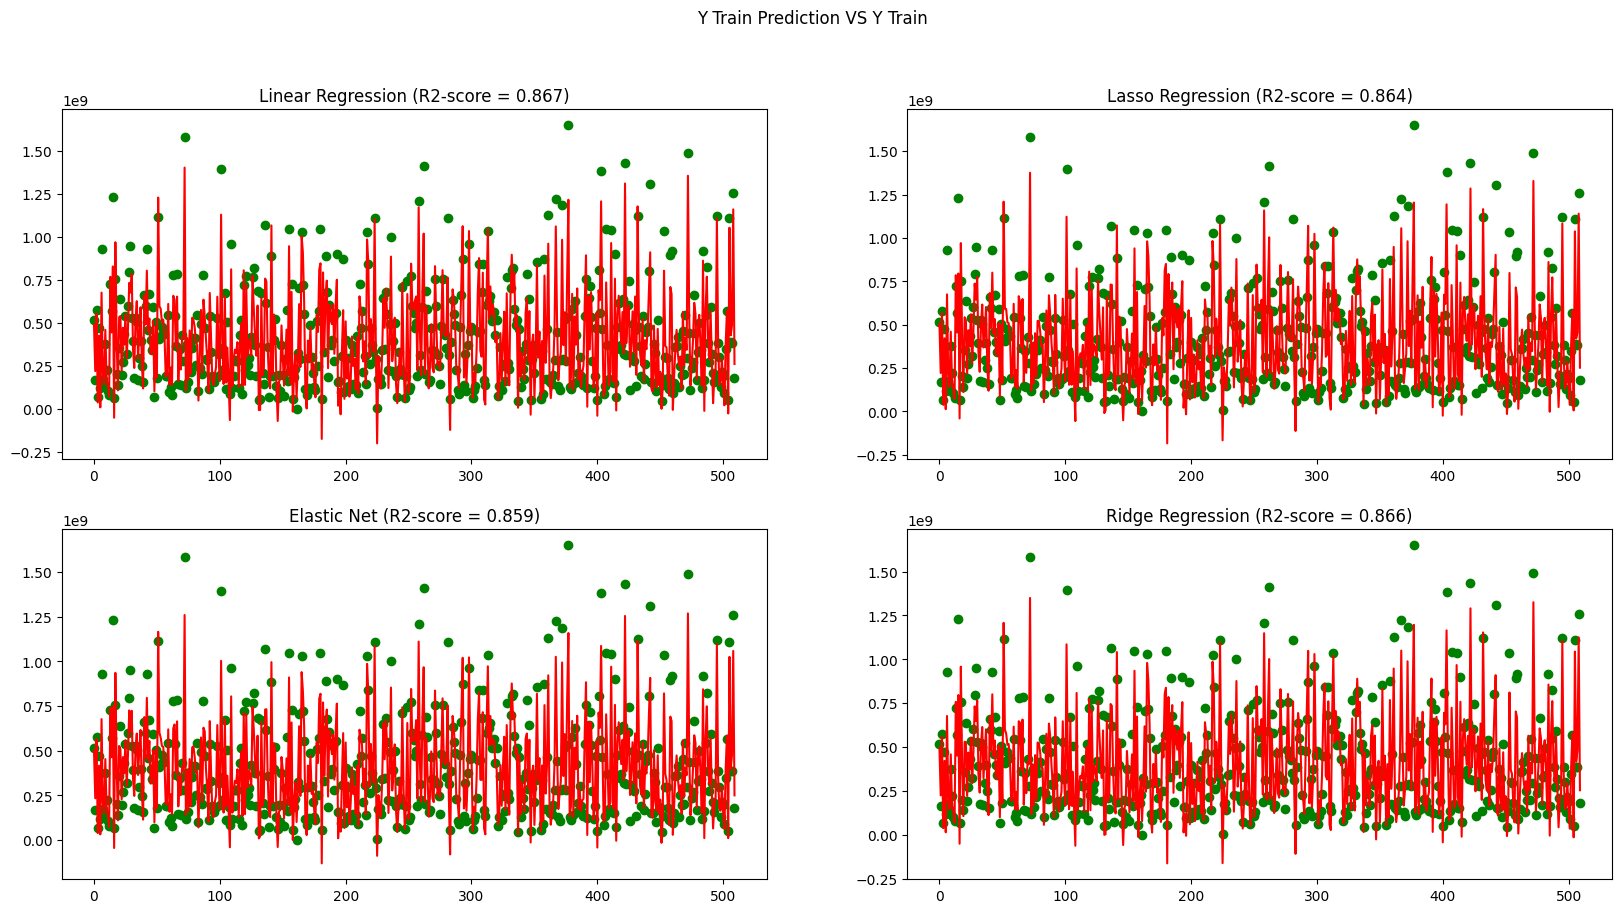

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle("Y Train Prediction VS Y Train")
plotting(axs[0,0], "Linear Regression",False)
plotting(axs[0,1], "Lasso Regression",False)
plotting(axs[1,0], "Elastic Net",False)
plotting(axs[1,1], "Ridge Regression",False)


In [ ]:
all_res.pivot_table(index="Model",columns='Matrices',values="Train Score")

Matrices,MAE,MSE,R2 Score,RMSE
Model,,,,
Elastic Net,8.008909e+07,1.253805e+16,0.858893,1.119734e+08
Lasso Regression,7.939282e+07,1.204281e+16,0.864466,1.097397e+08
Linear Regression,7.972692e+07,1.183704e+16,0.866782,1.087982e+08
Ridge Regression,7.949560e+07,1.193545e+16,0.865674,1.092495e+08


#### Overall

In [ ]:
all_res.melt(id_vars=["Model","Matrices"]).pivot_table(index=["variable","Model"],values='value',columns='Matrices')

Matrices                                MAE           MSE  R2 Score  \
variable    Model                                                     
Test Score  Elastic Net        9.531414e+07  2.667230e+16  0.753953   
            Lasso Regression   9.343145e+07  2.556021e+16  0.764212   
            Linear Regression  9.828010e+07  2.620604e+16  0.758254   
            Ridge Regression   9.574621e+07  2.604664e+16  0.759724   
Train Score Elastic Net        8.008909e+07  1.253805e+16  0.858893   
            Lasso Regression   7.939282e+07  1.204281e+16  0.864466   
            Linear Regression  7.972692e+07  1.183704e+16  0.866782   
            Ridge Regression   7.949560e+07  1.193545e+16  0.865674   

Matrices                               RMSE  
variable    Model                            
Test Score  Elastic Net        1.633166e+08  
            Lasso Regression   1.598756e+08  
            Linear Regression  1.618828e+08  
            Ridge Regression   1.613897e+08  
Train Score Elastic Net        1.119734e+08  
            Lasso Regression   1.097397e+08  
            Linear Regression  1.087982e+08  
            Ridge Regression   1.092495e+08

In [ ]:
def plot_model(axs,model,predict):
  if predict == True:
    real = y_test
    df = all_preds
  else:
    df = all_trains
    real = y_train
  axs.scatter(real,df.loc[df['Model'] == model,df.columns[2]])
  axs.plot([real.min(), real.max()], [real.min(), real.max()], 'k--', lw=3)
  axs.set_title(model)
  axs.set_xlabel('Actual Y')
  axs.set_ylabel('Predicted Y')

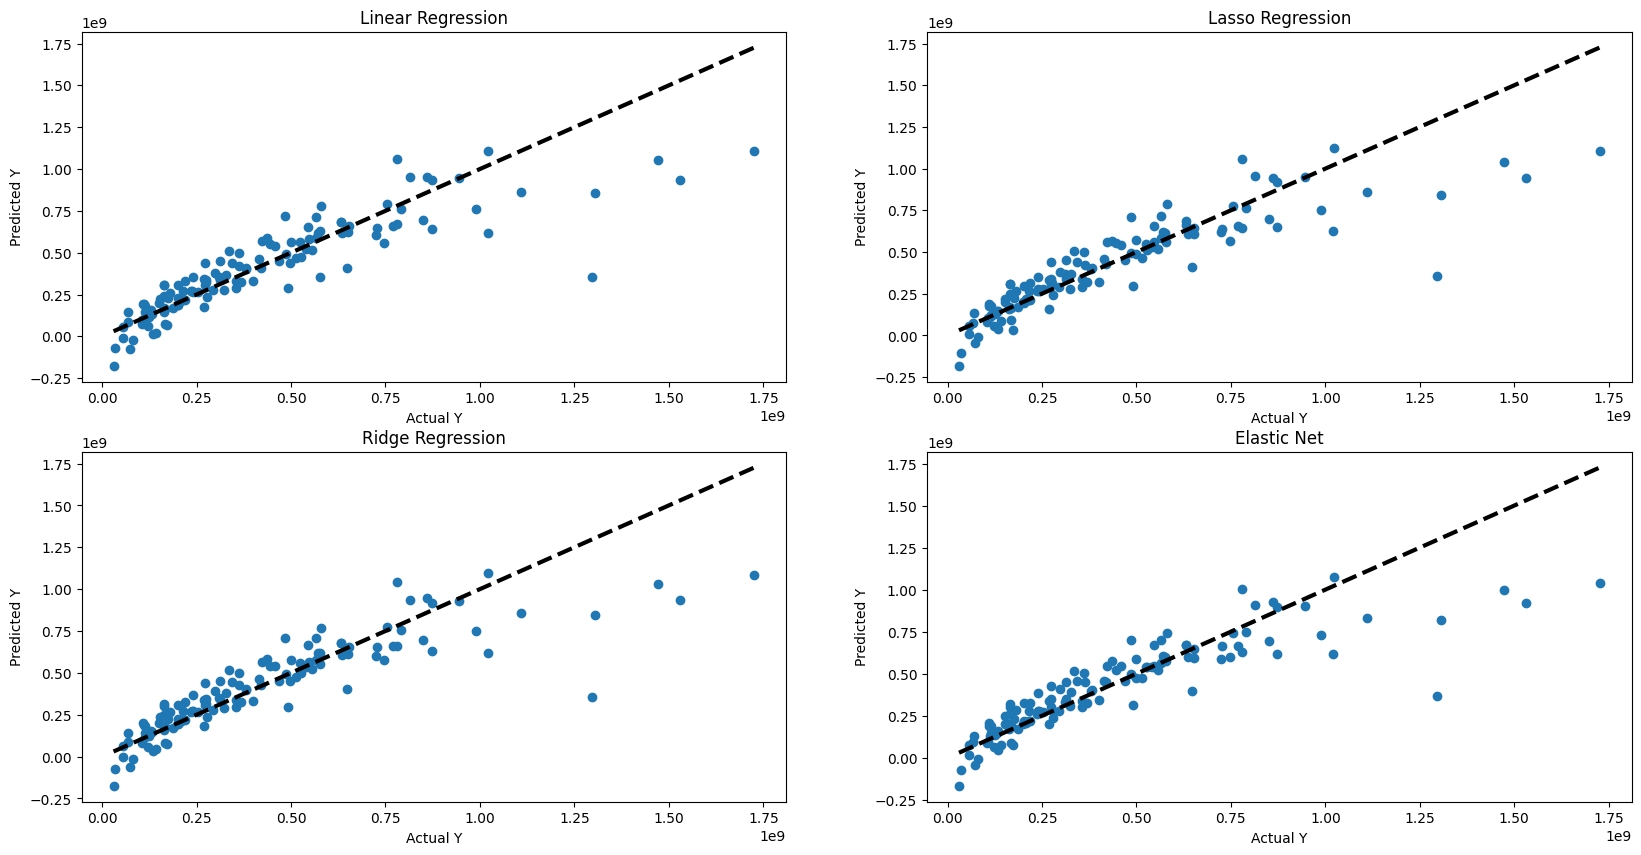

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
plot_model(axs[0,0],"Linear Regression", True)
plot_model(axs[0,1],"Lasso Regression", True)
plot_model(axs[1,0],"Ridge Regression", True)
plot_model(axs[1,1],"Elastic Net", True)

plt.show()

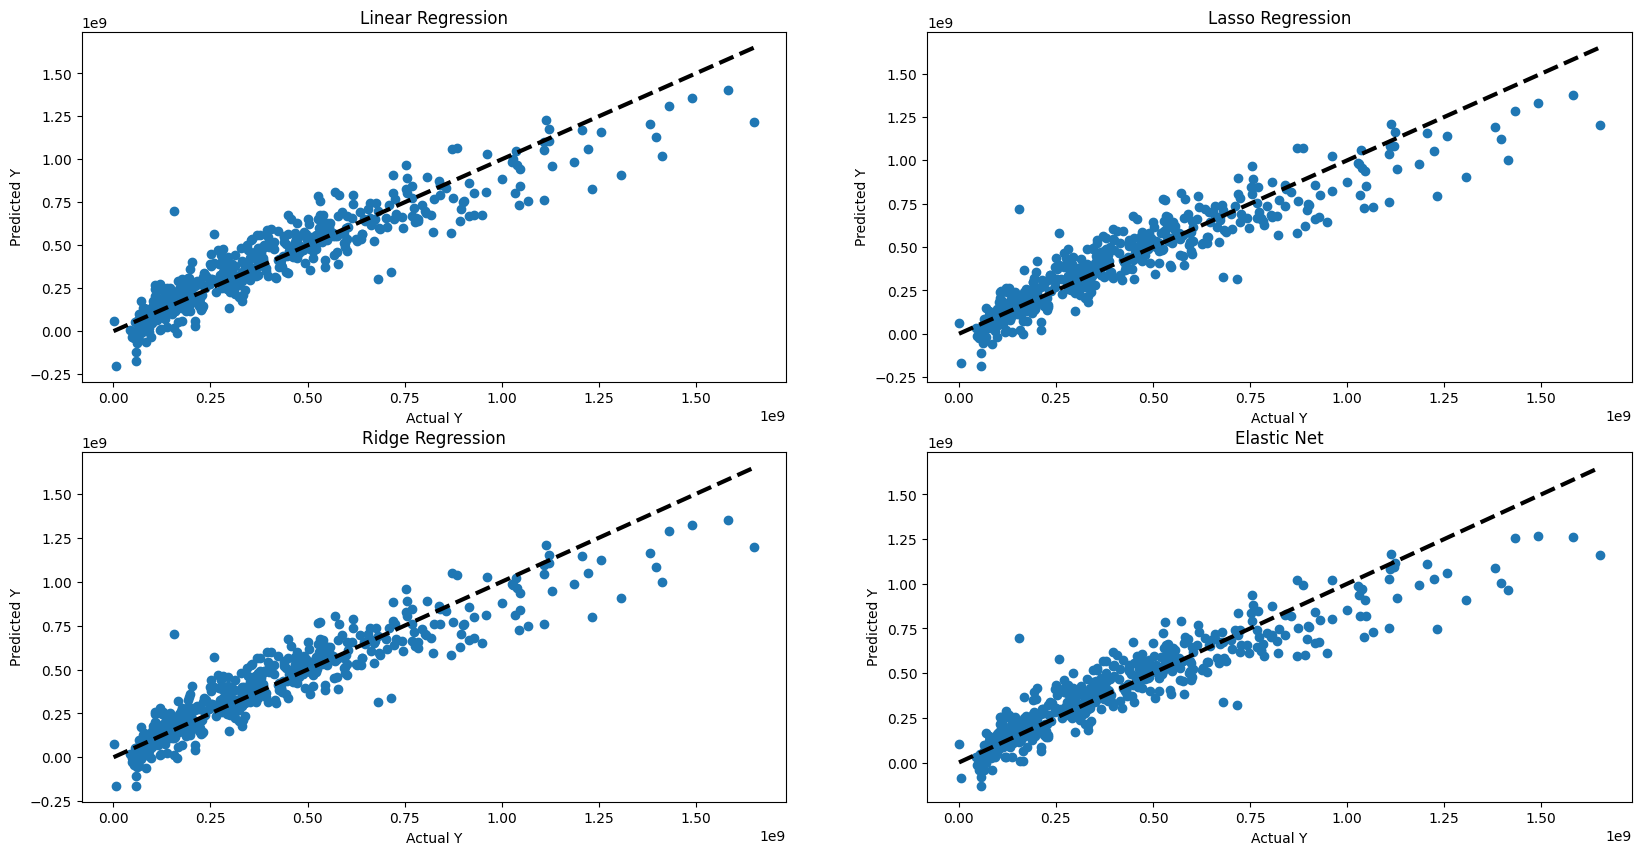

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
plot_model(axs[0,0],"Linear Regression", False)
plot_model(axs[0,1],"Lasso Regression", False)
plot_model(axs[1,0],"Ridge Regression", False)
plot_model(axs[1,1],"Elastic Net", False)

plt.show()